<a href="https://colab.research.google.com/github/savirhkhan/Scikit_learn_dump/blob/main/Plynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [60]:
#Loading data
df = pd.read_csv('/content/drive/MyDrive/Data sets/advertising1.csv')

In [61]:
df.shape

(200, 4)

In [62]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [63]:
X = df.drop('Sales',axis =1)

In [64]:
y = df['Sales']

In [65]:
#importing polynomial features library
from sklearn.preprocessing import PolynomialFeatures

In [66]:
#creating instance of polynimial features
poly_converter = PolynomialFeatures(degree= 2,include_bias = False)

In [67]:
poly_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [68]:
#transforming the features to the degree 2 without including bias means no 1
poly_features =  poly_converter.transform(X)

In [69]:
poly_features.shape

(200, 9)

In [70]:
# importing lib for train test septration on poly_features dataset created 
from sklearn.model_selection import train_test_split

In [71]:
#diving data set into train and test
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [72]:
#loading lib for linear regression 
from sklearn.linear_model import LinearRegression

In [73]:
#Creating Linear model
my_model = LinearRegression()

In [74]:
#fitting model with poly_features
my_model.fit(X_train,y_train)

LinearRegression()

In [75]:
#doing frediction on X_test data set created
test_predict = my_model.predict(X_test)

In [76]:
#Checkin Beta co-efficient
my_model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [77]:
#Importing error metrics
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [78]:
#generating Mean absolute error
MAE = mean_absolute_error(y_test,test_predict)

In [79]:
#Generating Mean Squared error
MSE = mean_squared_error(y_test,test_predict)

In [80]:
#generaing Root mean squared error
RMSE = np.sqrt(MSE)

In [81]:
MSE

0.4417505510403753

In [82]:
RMSE

0.6646431757269274

In [83]:
my_model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [84]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [85]:
X.iloc[0]

TV           230.1
Radio         37.8
Newspaper     69.2
Name: 0, dtype: float64

In [87]:
#creating diffrent order polynomial leter we will compare error vs complexity to choose the optimal degree for poly
train_rmse_errors = []
test_rmse_error = []

for i in range(1,10):
  poly_converter = PolynomialFeatures(degree= i,include_bias = False)
  poly_converter.fit(X)
  poly_features =  poly_converter.transform(X)
  
  X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
  
  my_model = LinearRegression()
  my_model.fit(X_train,y_train)

  train_predict = my_model.predict(X_train)
  test_predict = my_model.predict(X_test)

  train_rmse = np.sqrt(mean_squared_error(y_train,train_predict))
  test_rmse = np.sqrt(mean_squared_error(y_test,test_predict))

  train_rmse_errors.append(train_rmse)
  test_rmse_error.append(test_rmse)



In [88]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292231,
 0.43393443569020695,
 0.3517083688399345,
 0.2509342962601728,
 0.20872723323990588,
 5.421577514352753,
 0.14086751582412702,
 0.17118580360335042]

In [89]:
test_rmse_error

[1.5161519375993877,
 0.6646431757269274,
 0.5803286825215619,
 0.5077742637898888,
 2.5758141220971607,
 4.335318691649054,
 1379.171610491493,
 4129.0608136161545,
 96107.72947631204]

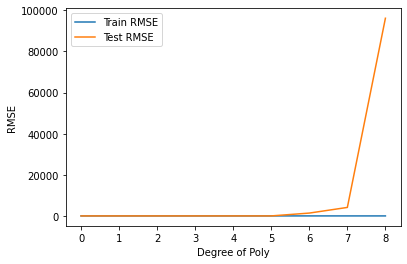

In [92]:
plt.plot(train_rmse_errors,label='Train RMSE')
plt.plot(test_rmse_error,label='Test RMSE')
plt.xlabel('Degree of Poly')
plt.ylabel("RMSE")

plt.legend()

**As we can see after the degree 6 there is huge jump, let see till degree 6**

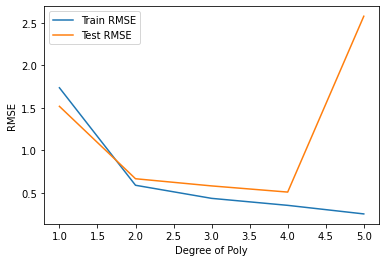

In [96]:
plt.plot(range(1,6),train_rmse_errors[:5],label='Train RMSE')
plt.plot(range(1,6),test_rmse_error[:5],label='Test RMSE')
plt.xlabel('Degree of Poly')
plt.ylabel("RMSE")

plt.legend()

From the Above plot, figure out that degree could be the optimal choice for our model

In [97]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [98]:
final_model = LinearRegression()

In [99]:
final_X = final_poly_converter.fit_transform(X)

In [101]:
final_model.fit(final_X,y)

LinearRegression()

In [103]:

from joblib import dump,load

In [105]:
#saving converter and final model
dump(final_model,'Final_poly_model.joblib')
dump(final_poly_converter,'final_poly_converter.joblib')

['final_poly_converter.joblib']

In [106]:
new_values = [[100,20,15]]

In [111]:
tran_data = final_poly_converter.fit_transform(new_values)

In [113]:
tran_data.shape

(1, 19)

In [114]:
final_model.predict(tran_data)

array([12.3819692])